# Zastosowanie autoenkoderów w wykrywaniu anomalii
Wykrywanie anomalii (anomaly detection) jest jednym z ważniejszych obszarów analizy danych i uczenia nienadzorowania w uczeniu maszynowym. Znajduje szerokie zastosowania w cyber-security, medycynie, czy po prostu w naukach przyrodniczych. W tym notebooku zajmiemy się wprowadzeniem do tematu wykrywania anomalii w uczeniu nienadzorowanym. 

Na stronie: https://anomagram.fastforwardlabs.com/#/ można znaleźć interaktywne wprowadzenie do koncepcji wykrywania anomalii za pomocą autoenkoderów.
Przeczytaj treść witryny. 
Na stronie: https://anomagram.fastforwardlabs.com/#/train znajduje się interaktywny trening wykrywacza anomalii na podstawie zbioru danych ECG5000 (szeregi czasowe z kadriogramu)
Poniżej znajduje się eksploracja tego zbioru danych. Dodatkowo, na ostatniej pozycji każdego z wektora punktu danych znajduje się informacja 
(1 == normal, 0 == abnormal)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# Load the dataset
dataframe = pd.read_csv('ECG5000/ECG5000.csv', header=None)
raw_data = dataframe.values

In [3]:
labels = raw_data[:, -1]

data = raw_data[:,:-1]
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [4]:
min_val = np.min(train_data)
max_val = np.max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = torch.tensor(train_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)

Pytanie powtórkowe: Dlaczego normalizacja min/max z danych treningowych również na dane testowe?

In [5]:
#odpowiedz 

In [6]:
normal_train_data = train_data[train_labels == 1]
normal_test_data = test_data[test_labels == 1]

anomalous_train_data = train_data[train_labels == 0]
anomalous_test_data = test_data[test_labels == 0]

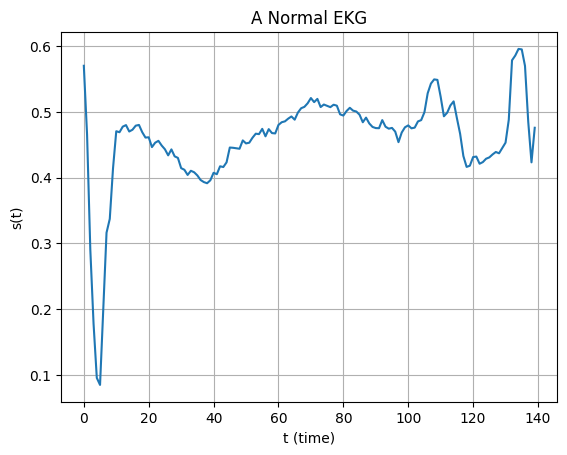

In [7]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal EKG")
plt.xlabel("t (time)")
plt.ylabel("s(t)")
plt.show()

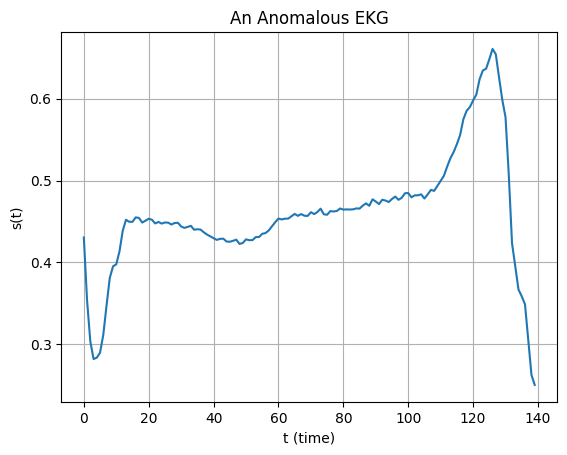

In [8]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous EKG")
plt.xlabel("t (time)")
plt.ylabel("s(t)")
plt.show()

In [9]:
class AutoEncoderForAnomalyDetection(torch.nn.Module):
    def __init__(self):
        super(AutoEncoderForAnomalyDetection, self).__init__()
        self.latent_dim = 5
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(140,8),
            #torch.nn.ReLU(),
            torch.nn.Linear(8,7),
            #torch.nn.ReLU(),
            torch.nn.Linear(7,6),
            #torch.nn.ReLU(),
            torch.nn.Linear(6,self.latent_dim),
        ).to(device)
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(self.latent_dim,6),
            #torch.nn.ReLU(),
            torch.nn.Linear(6,7),
            #torch.nn.ReLU(),
            torch.nn.Linear(7,8),
            #torch.nn.ReLU(),
            torch.nn.Linear(8,140),
        ).to(device)
        
    def decode(self, encoded):
        return self.decoder(encoded)
    
    def encode(self, x):
        return self.encoder(x)

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded


# ZADANIE 4
Wzorując się na instrukcji implementacyjnej z https://anomagram.fastforwardlabs.com/#/, wytrenuj jak najlepszy własny model detekcji anomalii. Jak zdefiniujemy najlepszy? Można odpowiedzieć na to pytanie, analizując konkretny use- case (w tym przypadku chcielibyśmy analizować pod kątem precision-recall tradeoff). Dobierz samodzielnie optymalizator, hiperparametry itd. Możesz wspierać się symulacją treningu i wizualizacją z: https://anomagram.fastforwardlabs.com/#/train.  Samodzielnie zobrazuj efekty pracy swojego modelu, dobierając odpowiednie metryki. Wykorzystaj dane treningowe przygotowane wyżej (plik ECG5000/ECG5000.csv).  

In [ ]:
# miejsce na kod 

# Podsumowanie
W tym notebooku omówiliśmy najważniejsze tematy związane z Autoenkoderem. W szczególności, wiele czasu poświęciliśmy wizualizacjom przestrzeni ukrytej generowanej przez modele. Jako przykład praktycznego zastosowania, poznaliśmy sposób, w jaki można wykorzystywać autoenkodery do detekcji anomalii (w naszym przypadku - EKG). Mamy nadzieję, że te zajęcia przyczyniły się do rozwoju wiedzy czytelników w tematyce uczenia nienadzorowanego.